<a href="https://colab.research.google.com/github/abdalhalem-alfakhrany/Al-DsProject/blob/master/Copy_of_project_IDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split


%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [ ]:
#load the data 
from google.colab import files
uploaded = files.upload()


Saving Heart desease.xlsx to Heart desease.xlsx


In [ ]:
 #store the data into a variable
data = pd.read_excel('/content/Heart desease.xlsx')
#print the first 20 rows of the data
data.head(20)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke
0,1,9,0,168,62,110,80,1,1,0
1,2,7,0,156,85,140,90,3,1,0
2,3,9,1,165,64,130,70,3,1,0
3,4,11,0,169,82,150,100,1,1,1
4,5,11,0,156,56,100,60,1,1,1
5,6,10,1,151,67,120,80,2,2,0
6,7,9,0,157,93,130,80,3,1,0
7,8,11,0,178,95,130,90,3,3,1
8,9,9,0,158,71,110,70,1,1,0
9,10,8,1,164,68,110,60,1,1,0


In [ ]:
#get the shape of the data 
data.shape



(19, 10)

In [ ]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke'],
      dtype='object')

In [ ]:
#count the empty values in each column
#data.isna().sum() 

#another way to check for any null or missing values
data.isnull().values.any()


False

In [ ]:
#view some basic statistics
data.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,10.210526,8.631579,0.368421,161.105263,76.368421,126.842105,77.368421,2.000000,1.315789,0.368421
std,5.930889,2.671049,0.495595,14.873148,15.836703,22.620696,13.679711,1.247219,0.582393,0.495595
min,1.000000,2.000000,0.000000,122.000000,50.000000,100.000000,50.000000,1.000000,1.000000,0.000000
25%,5.500000,7.000000,0.000000,156.000000,63.000000,110.000000,70.000000,1.000000,1.000000,0.000000
50%,10.000000,9.000000,0.000000,165.000000,75.000000,120.000000,80.000000,1.000000,1.000000,0.000000
75%,14.500000,10.500000,1.000000,169.500000,91.000000,135.000000,85.000000,3.000000,1.500000,1.000000
max,20.000000,13.000000,1.000000,180.000000,100.000000,200.000000,100.000000,5.000000,3.000000,1.000000


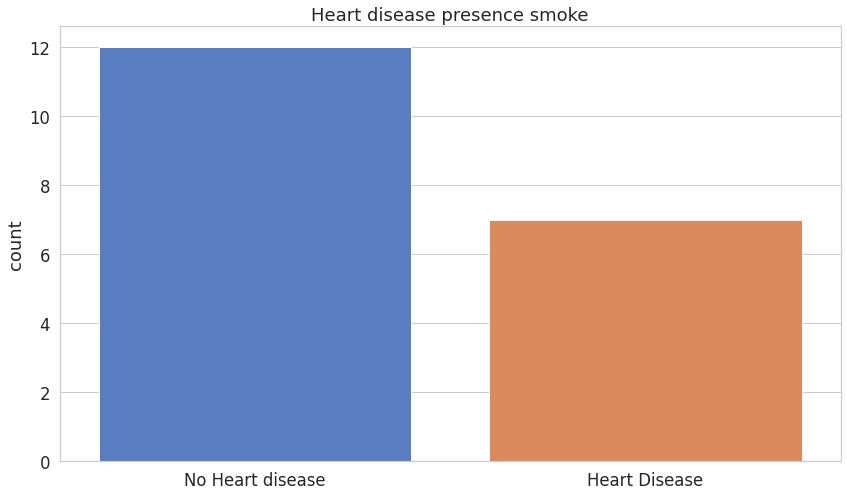

In [ ]:
f = sns.countplot(x='smoke', data=data)
f.set_title("Heart disease presence smoke")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");
plt.show();

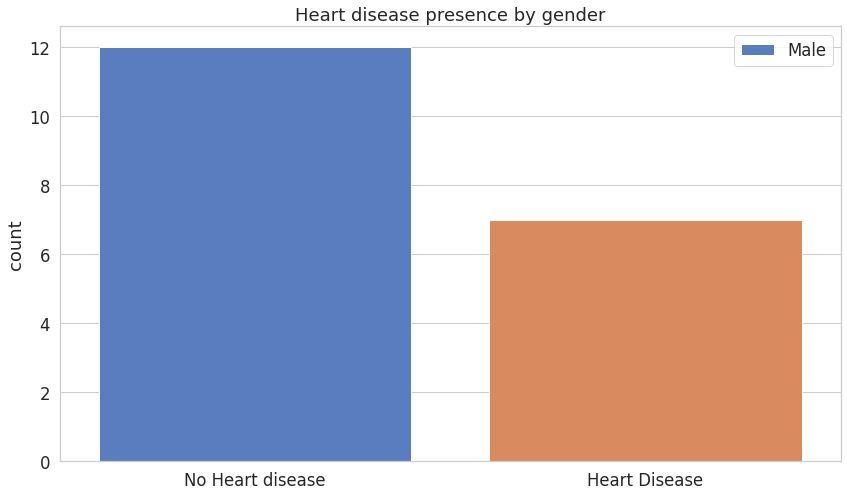

In [ ]:
f = sns.countplot(x='gender', data=data, )
plt.legend(['Male', 'Female'])
f.set_title("Heart disease presence by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

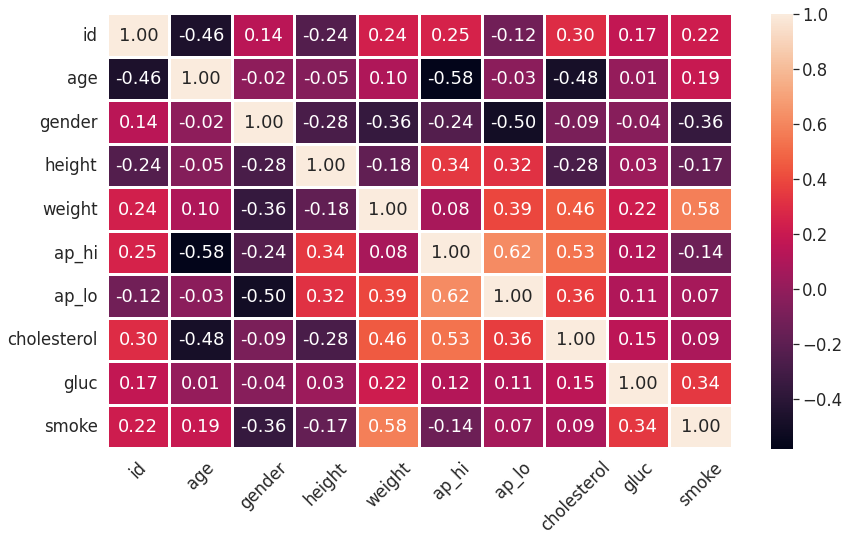

In [ ]:
heat_map = sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);

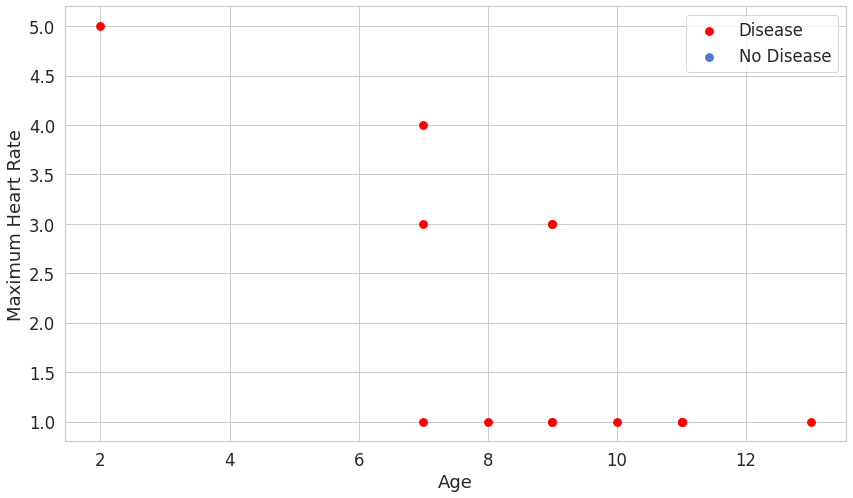

In [ ]:
plt.scatter(x=data.age[data.gluc==1], y=data.cholesterol[(data.gluc==1)], c="red", s=60)
plt.scatter(x=data.age[data.gluc==0], y=data.cholesterol[(data.gluc==0)], s=60)
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate");

In [ ]:
feature_columns = []

# numeric cols
for header in ['age', 'gender	', 'height', 'weight', 'ap_hi', '	cholesterol']:
  feature_columns.append(tf.feature_column.numeric_column(header))
  # bucketized cols
age = tf.feature_column.numeric_column("age")
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
feature_columns.append(age_buckets)

In [ ]:
#get acount of the number of patients with a coradiovascular disease and without 

data.value_counts()



id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke
1   9    0       168     62      110    80     1            1     0        1
11  13   1       169     80      120    80     1            1     0        1
19  7    1       122     95      100    60     4            1     1        1
18  10   0       130     99      130    90     3            2     1        1
17  6    1       155     50      140    50     1            2     0        1
15  4    0       180     89      140    80     2            2     1        1
14  11   0       170     100     110    70     1            1     1        1
13  7    1       165     60      120    80     1            1     0        1
12  10   0       173     60      120    80     1            1     0        1
10  8    1       164     68      110    60     1            1     0        1
2   7    0       156     85      140    90     3            1     0        1
9   9    0       158     71      110    70     1            1     0        1
8   

In [ ]:
#visualize the count 
# sns.countplot('age')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

In [ ]:
#look at the number of people whith acardiovascular dissease that exceed the number of peapole without acard
#creat a years column
data['years'] = (data['age']/365).round(0)
data['years'] = pd.to_numeric( data['years'] , downcast='float' )

#visualize the data 
# sns.countplot( x='years', hue='/content/Heart desease.xlsx', data=data , palette='colorblined', edgecolor=sns.color_palette('dark' ,n_colors=1) )

ValueError: ignored

In [ ]:
#get the correlation of the columns 
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,years
id,1.000000,-0.457745,0.142254,-0.238961,0.236905,0.253689,-0.122894,0.300417,0.172690,0.217857,NaN
age,-0.457745,1.000000,-0.017671,-0.050712,0.103202,-0.581205,-0.028008,-0.483616,0.007519,0.192170,NaN
gender,0.142254,-0.017671,1.000000,-0.276885,-0.358019,-0.237346,-0.504610,-0.089879,-0.040522,-0.357143,NaN
height,-0.238961,-0.050712,-0.276885,1.000000,-0.184147,0.344507,0.315449,-0.275530,0.034431,-0.171367,NaN
weight,0.236905,0.103202,-0.358019,-0.184147,1.000000,0.076316,0.389384,0.455654,0.221600,0.576332,NaN
ap_hi,0.253689,-0.581205,-0.237346,0.344507,0.076316,1.000000,0.617972,0.531670,0.122072,-0.138235,NaN
ap_lo,-0.122894,-0.028008,-0.504610,0.315449,0.389384,0.617972,1.000000,0.358179,0.110104,0.069007,NaN
cholesterol,0.300417,-0.483616,-0.089879,-0.275530,0.455654,0.531670,0.358179,1.000000,0.152967,0.089879,NaN
gluc,0.172690,0.007519,-0.040522,0.034431,0.221600,0.122072,0.110104,0.152967,1.000000,0.344437,NaN
smoke,0.217857,0.192170,-0.357143,-0.171367,0.576332,-0.138235,0.069007,0.089879,0.344437,1.000000,NaN


In [ ]:
# visualize the data 
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
# sns.heatmap(df.corr(), annot=true, fmt='.0%')

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [ ]:
#spliti the data into feature data and target data
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

NameError: ignored

In [ ]:
#split the data again,into 75% training data set and 25% testing data set
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state =1)

NameError: ignored

In [ ]:
#feature scaling 
#scaling the values in the data to be values between 0 and 1 inclusive
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 

NameError: ignored

In [ ]:
#use randomforeest classifer
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy' , random_state = 1)
forest.fit(X_train,y_train)

NameError: ignored

In [ ]:
#test the models accuracy on the triaing data set 
models = forest
models.score(X_train, y_train)


1.0

In [ ]:
#test models accoaracy on the test data set
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, models.predict(X_test))

# TN = cm[0][0]
# TP = cm[1][1]
# FN = cm[1][0]
# FP = cm[0][1]

#print the confusion matrix
print(cm)

#print the models acuracy on the test data 
# print('model tast accuracy={}' . fromat(TP + TN)/(TP+TN+FN+FP))

[[5]]
